<a href="https://colab.research.google.com/github/on-kulyashov/Code-for-NMR-course/blob/main/Spin1(RK4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

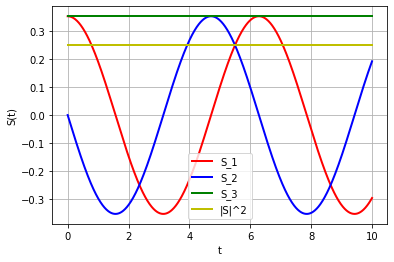

error for classical problem at t = 10, er = 2.485395778073496e-10


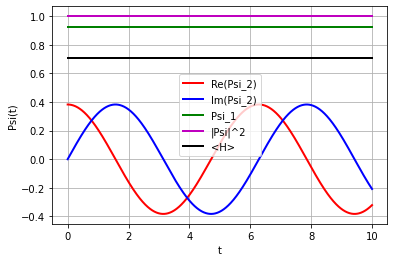

error for quantum problem at t = 10, er = 1.9930657866167034e-11


In [ ]:
import numpy as np
from scipy.linalg import schur
import matplotlib.pyplot as plt


# initializing magnetic field
H = np.array([0,0,1])

# RK4 method    
def yn1(f, yn, xn, h):
    k1 = f(xn, yn)
    k2 = f(xn + h/2, yn + h*k1/2)
    k3 = f(xn + h/2, yn + h*k2/2)
    k4 = f(xn + h, yn + h*k3)
    return yn + h/6 * (k1 + 2*k2 + 2*k3 + k4)


def integrate(f, a, y_a, h):
    sol = [y_a]
    for i in range(int((b-a)//h) + 1):
        sol.append(yn1(f, sol[-1], a + i*h, h))
    return sol


def dist(x, y):
    return np.amax(np.abs(x - y))


def er(y1, y2):
    return max(list(map(lambda x, y: dist(x, y), y1, y2[::2])))

# classical spin model
def cls(t, s):
    return np.cross(s, H)


n = 1000
a, b = 0, 10
t = np.linspace(a, b, num=n+1)

y_a = np.sqrt([1/8, 0, 1/8])
h = (b - a)/n
s1 = integrate(cls, a, y_a, h)
s2 = integrate(cls, a, y_a, h/2)
p1 = [s[0] for s in s1]
p2 = [s[1] for s in s1]
p3 = [s[2] for s in s1]
abs_s = [np.dot(s,s) for s in s1]

plt.plot(t, p1, 'r-', linewidth=2.0)
plt.plot(t, p2, 'b-', linewidth=2.0)
plt.plot(t, p3, 'g-', linewidth=2.0)
plt.plot(t, abs_s, 'y-', linewidth=2.0)
plt.xlabel("t")
plt.ylabel("S(t)")
plt.legend(["S_1","S_2", "S_3", "|S|^2"])
plt.grid()
plt.show()

def classic_analytic(t):
    return np.sqrt(1/8) * np.array([np.cos(-t), np.sin(-t), 1])


print("error for classical problem at t = 10, er = " + str(dist(classic_analytic(10), s1[-1])))

# quantum spin model
sigma = [np.array([[0,1],[1,0]]), np.array([[0, -1j],[1j, 0]]), np.array([[1, 0],[0, -1]])]
hamiltonian = np.tensordot(sigma, H, axes=([0],[0]))
# diag_hamiltonian, transfer = schur(hamiltonian, output='complex') 
# uncomment the above line to get solution with diagonilized hamiltonian

def bilin(u, v, A):
    return np.vdot(u, np.matmul(A, v))


def qnt(t, psi):
    return (-1j/2) * np.matmul(hamiltonian, psi)


def phase_shift(psi):
    return psi*np.conjugate(psi[0])/np.abs(psi[0])

y_a = np.array([np.cos(np.pi / 8), np.sin(np.pi / 8)])
s1 = np.array([phase_shift(s) for s in integrate(qnt, a, y_a, h)])
s2 = np.array([phase_shift(s) for s in integrate(qnt, a, y_a, h/2)])
# s1 = np.array([np.matmul(transfer, psi) for s in s1])
# s1 = np.array([np.matmul(transfer, psi) for s in s2])
# uncomment the above two lines to get solution with diagonilized hamiltonian
p1 = [np.real(s[1]) for s in s1]
p2 = [np.imag(s[1]) for s in s1]
p3 = [np.real_if_close(s[0]) for s in s1]
abs_psi = [np.real_if_close(np.vdot(psi,psi)) for psi in s1]
energy = [np.real_if_close(bilin(psi, psi, hamiltonian)) for psi in s1]

plt.plot(t,p1,'r-', linewidth=2.0)
plt.plot(t,p2,'b-', linewidth=2.0)
plt.plot(t,p3,'g-', linewidth=2.0)
plt.plot(t, abs_psi, 'm-', linewidth=2.0)
plt.plot(t, energy, 'k-', linewidth=2.0)
plt.xlabel("t")
plt.ylabel("Psi(t)")
plt.legend(["Re(Psi_2)","Im(Psi_2)", "Psi_1", "|Psi|^2", "<H>"])
plt.grid()
plt.show()

def quant_analytic(t):
    return y_a * np.array([1, np.exp(1j*t)])

print("error for quantum problem at t = 10, er = " + str(dist(quant_analytic(10), s1[-1])))
